# Fourier Transform

Any periodic function can be expressed as a weighted sum (infinite) of sine and cosine functions of varying frequency

$$ f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} [a_n \cos(n\omega_0x) + b_n \sin(n\omega_0x)] $$


where,  

- $ f(x) $ represents the periodic function,
- $ \frac{a_0}{2} $ is the average value of the function,
- $ a_n $ and $ b_n $ are the Fourier coefficients,
- $ n $ is an integer $ (n = 1, 2, 3, \ldots $,
- $ \omega_0 $ is the fundamental angular frequency, and
- $ x $ is the independent variable.



The fourier coefficients are:  
$ a_n = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} f(x) \cos \left( \frac{2\pi nx}{T} \right) \, dx $

$ b_n = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} f(x) \sin \left( \frac{2\pi nx}{T} \right) \, dx $

where:
- $ T $ is the period of the function,
- $ n $ is an integer ($ n = 0, 1, 2, \ldots $),
- $ \cos $ and $ \sin $ are the cosine and sine functions, respectively,
- $ f(x) $ is the periodic function, and
- $ dx $ represents the differential element with respect to $ x $.

## Code


Code Source: 
1. https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a
2. https://i-systems.github.io/teaching/image_proc/iNotes/02_image_in_freq_py.html


In [3]:
import sys
import cv2 
import numpy as np
import matplotlib.pyplot as plt

### FFT of an Image


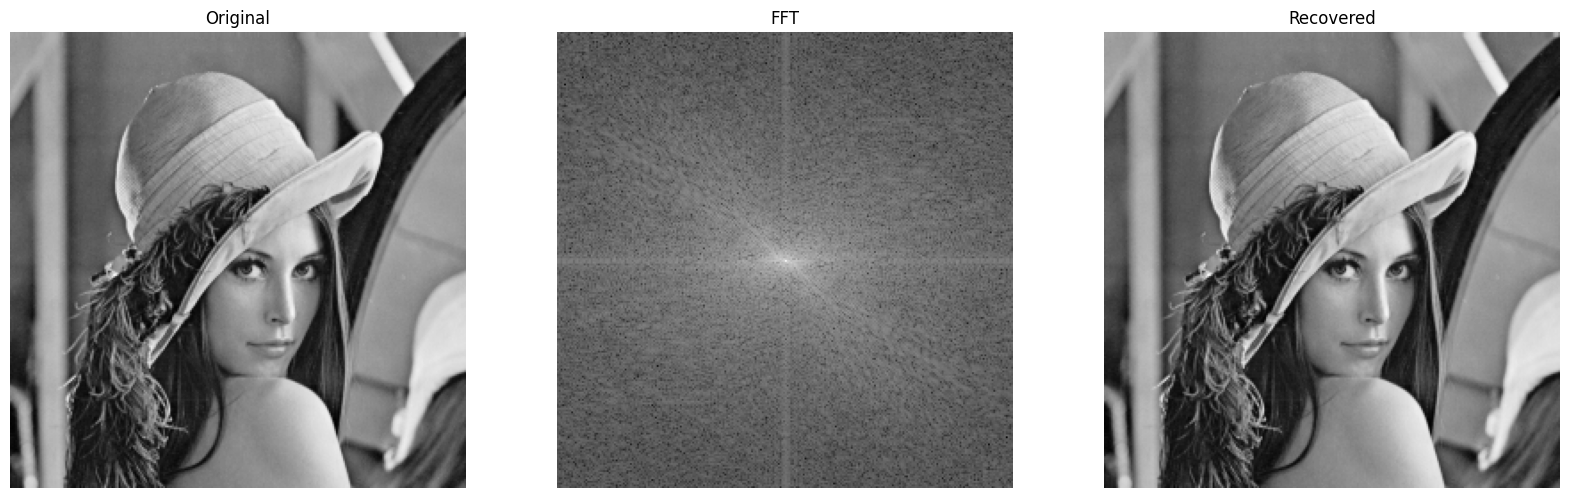

In [5]:
cm = cv2.imread('./Images/lena.png', 0)

CMs = np.fft.fftshift(np.fft.fft2(cm))
CMr = np.fft.ifftshift(CMs)
cmr = np.fft.ifft2(CMr)

plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('FFT')
plt.imshow(np.log(1+np.absolute(CMs)), cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Recovered')
plt.imshow(np.real(cmr), cmap = 'gray')
plt.axis('off')

plt.show()


### Bilateral Filtering


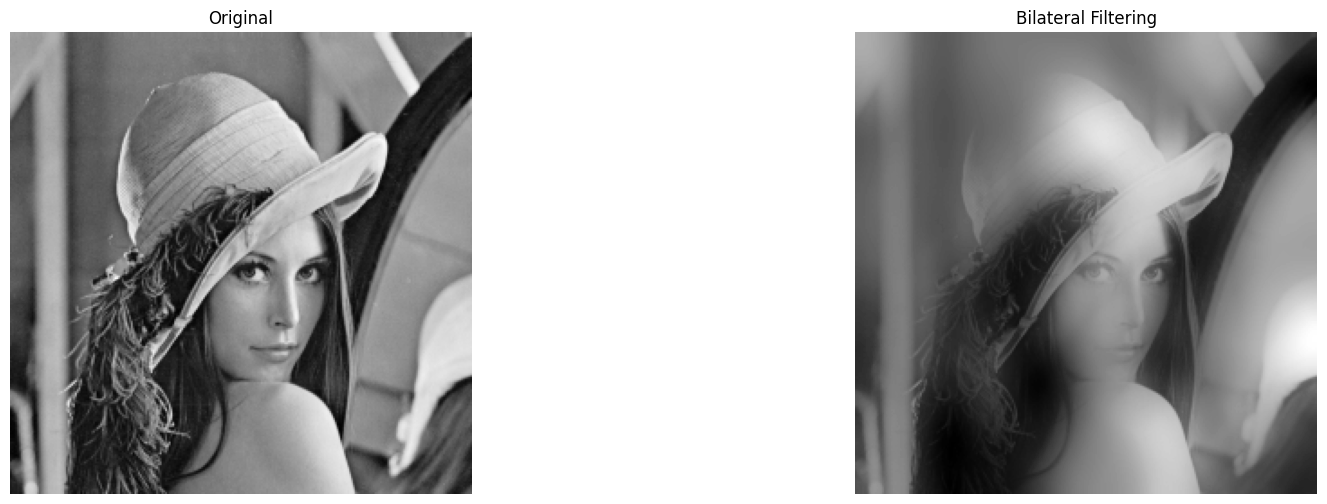

In [6]:
blur = cv2.bilateralFilter(cm,50,100,20)
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Bilateral Filtering')
plt.imshow(blur, cmap = 'gray')
plt.axis('off')

plt.show()


### Low Pass Filter


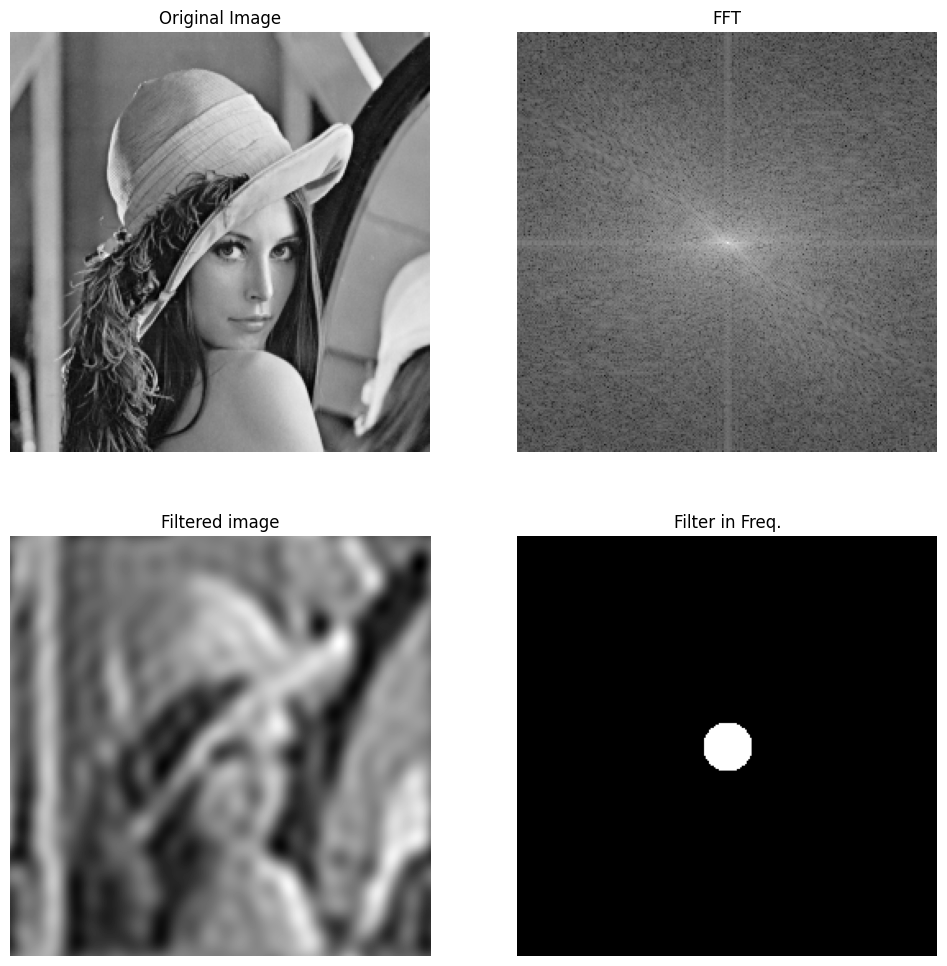

In [7]:
N=2**8 ## relative to the image
x, y = np.meshgrid(np.arange(-int(N/2), int(N/2), 1), np.arange(-int(N/2), int(N/2), 1))
z = np.sqrt(x**2 + y**2)

C = z < 15

CMFs = CMs*C

CMFr = np.fft.ifftshift(CMFs)
cmfr = np.fft.ifft2(CMFr)

plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('FFT')
plt.imshow(np.log(1+np.absolute(CMs)), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Filtered image')
plt.imshow(np.real(cmfr), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Filter in Freq.')
plt.imshow(np.log(1+np.absolute(C)), cmap = 'gray')
plt.axis('off')

plt.show()



#### Butterworth type


$$ Filter = \frac{1}{1+ \alpha(x^2 + y^2)}

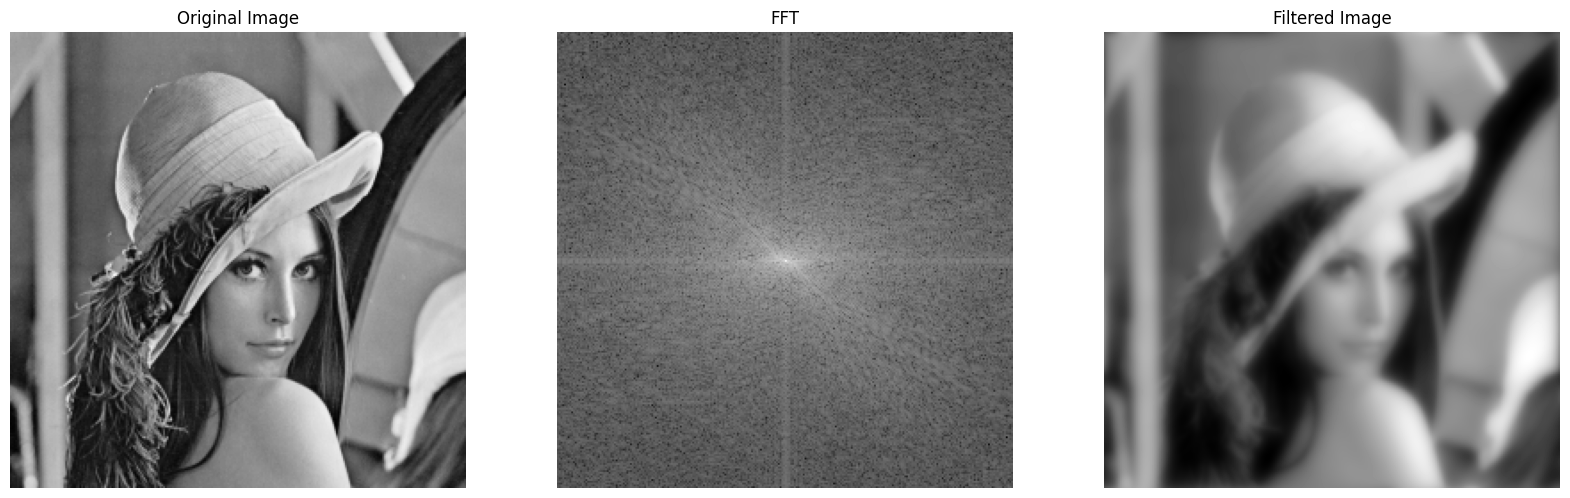

In [8]:
x, y = np.meshgrid(np.arange(N), np.arange(N))
z = np.sqrt((x - N/2)**2 + (y - N/2)**2)

D = 1/(1 + (z/10)**2) # filter in the frequency domain

CMFs = CMs*D

CMFr = np.fft.ifftshift(CMFs)
cmfr = np.fft.ifft2(CMFr)

plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('FFT')
plt.imshow(np.log(1+np.absolute(CMs)), cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Filtered Image')
plt.imshow(np.real(cmfr), cmap = 'gray')
plt.axis('off')

plt.show()



#### Gaussian Type


In [ ]:
x, y = np.meshgrid(np.arange(-int(N/2), int(N/2), 1), np.arange(-int(N/2), int(N/2), 1))
Z = np.exp(- 0.0005*x**2 - 0.0005*y**2) # Gaussian

CMFs = CMs*Z

CMFr = np.fft.ifftshift(CMFs)
cmfr = np.fft.ifft2(CMFr)

plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Filtered FFT')
plt.imshow(np.log(1+np.absolute(CMFs)), cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Filtered Image')
plt.imshow(np.real(cmfr), cmap = 'gray')
plt.axis('off')

plt.show()


In [ ]:

## High Pass Filter


x, y = np.meshgrid(np.arange(-int(N/2), int(N/2), 1), np.arange(-int(N/2), int(N/2), 1))
z = np.sqrt(x**2 + y**2)

C = z > 40
CMFs = CMs*C

CMFr = np.fft.ifftshift(CMFs)
cmfr = np.fft.ifft2(CMFr)

plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('FFT')
plt.imshow(np.log(1+np.absolute(CMs)), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Filtered Image')
plt.imshow(np.real(cmfr), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Filter in Freq.')
plt.imshow(np.log(1+np.absolute(C)), cmap = 'gray')
plt.axis('off')

plt.show()

x, y = np.meshgrid(np.arange(-int(N/2), int(N/2), 1), np.arange(-int(N/2), int(N/2), 1))
Z = 1 - np.exp(- 0.0005*x**2 - 0.0005*y**2) # Gaussian

CMFs = CMs*Z

CMFr = np.fft.ifftshift(CMFs)
cmfr = np.fft.ifft2(CMFr)

plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Filtered FFT')
plt.imshow(np.log(1+np.absolute(CMFs)), cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Filtered Image')
plt.imshow(np.real(cmfr), cmap = 'gray')
plt.axis('off')

plt.show()



N = 2**10
x, y = np.meshgrid(np.arange(N), np.arange(N))
z = np.sqrt((x - N/2)**2 + (y - N/2)**2)

D = 1 - 1/(1 + (z/10)**2) # filter in the frequency domain

CMFs = CMs*D

CMFr = np.fft.ifftshift(CMFs)
cmfr = np.fft.ifft2(CMFr)

plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cm, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Filtered FFT')
plt.imshow(np.log(1+np.absolute(CMFs)), cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Filtered Image')
image=np.real(cmfr)
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.show()